## K Means Clustering in Big Mart Sale 

* Data set are from [here](https://drive.google.com/file/d/1ZzEouo7lRJvajxK6jLM2K_p9xAwGw1tS/view).
* More info about the data [here](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/?utm_source=blog&utm_medium=comprehensive-guide-k-means-clustering).


In [ ]:
### Import Libs

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### Load Data set

In [4]:
Data_org = pd.read_csv('data/clustering.csv')

In [5]:
print(Data_org.shape)
Data_org.head(4)

(381, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here we only take two variables from the data – “LoanAmount” and “ApplicantIncome”.
This will make it easy to visualize the steps as well. Let’s pick these two variables and visualize the data
points:

In [6]:
X = Data_org[["LoanAmount","ApplicantIncome"]]

### Visualise data points

Text(0, 0.5, 'Loan Amount (In Thousands)')

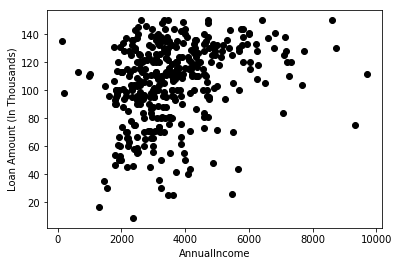

In [7]:
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')

In [8]:
X.head(5)

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


## Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X)
scaled_arr = scale.transform(X)


C:\Users\FirouzehPC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\FirouzehPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [10]:
Xscaled = pd.DataFrame(data=scaled_arr, columns= X.columns)
Xscaled.head(4)

,LoanAmount,ApplicantIncome
0,0.812575,0.707469
1,-1.376596,-0.408932
2,0.530102,-0.703019
3,1.271595,1.706799


Text(0, 0.5, 'Loan Amount (In Thousands)')

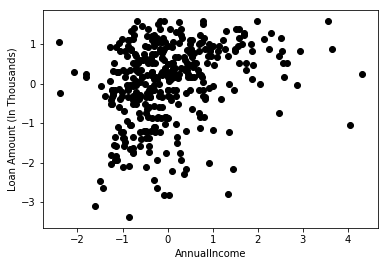

In [11]:
plt.scatter(Xscaled["ApplicantIncome"],Xscaled["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')

In [113]:
from sklearn.cluster import KMeans

In [154]:
k = 3

In [171]:
model = KMeans(n_clusters=k)
model.fit(Xscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [172]:

labels = model.labels_
centroids = model.cluster_centers_

In [173]:
centroids.shape

(3, 2)

In [174]:
centroids

array([[ 0.40863783, -0.41159803],
       [-1.39880054, -0.38169671],
       [ 0.64233436,  1.42076412]])

In [175]:
model.inertia_

286.5761231062562

In [176]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(X,model.labels_)

0.11977875631561362

In [177]:
silh0 = silh_samples[labels==0]
print(silh0.shape)
silh0[silh0>0.5].shape 

(200,)


(151,)

In [178]:
silh1 = silh_samples[labels==1]
print(silh1.shape)
silh1[silh1>0.5].shape 

(97,)


(83,)

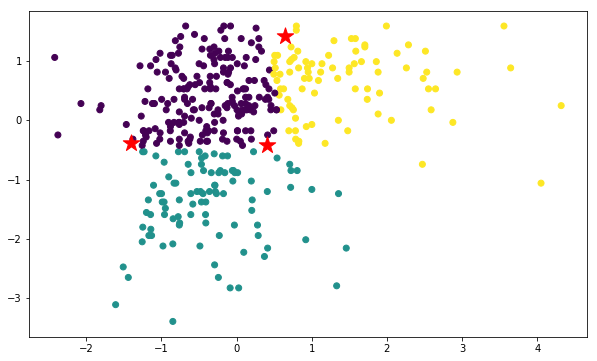

In [179]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(Xscaled["ApplicantIncome"], Xscaled["LoanAmount"], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='r', label='centroid')


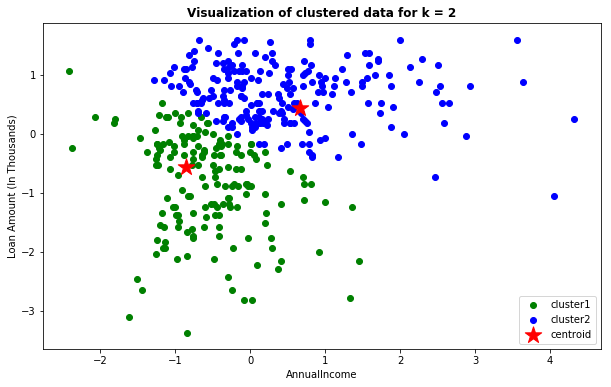

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(Xscaled[labels==0]["ApplicantIncome"],Xscaled[labels==0]["LoanAmount"],c='green', label= 'cluster1')
plt.scatter(Xscaled[labels==1]["ApplicantIncome"],Xscaled[labels==1]["LoanAmount"],c='blue', label= 'cluster2')

plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=300, c='r', label='centroid')

plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Visualization of clustered data for k = {}'.format(k), fontweight='bold')

plt.legend(loc =4)

In [27]:
SSE =[]
list_k = list(range(1,10))
print(list_k)
for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(X)
    SSE.append(model.inertia_)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


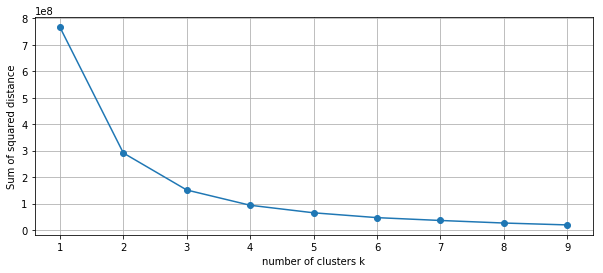

In [39]:
## plot SSE against K
plt.figure(figsize=(10,4))
plt.plot(list_k, SSE, marker ='o')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distance')
plt.grid(True)